# Regression analysis: bivariate


###  Reference

- Book: "Estadistica Aplicada", *Julian de la Horra Navarro*.

In [99]:
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Sample average
$ \overline{x} = \frac{1}{n} \sum_{i=0}^{n} x_{i} $

### Sample Variance

$ \nu_{x} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x})^2 $

### Sample Covariance

$ cov_{x,y} = \frac{1}{n} \sum_{i=0}^{n} (x_{i} - \overline{x}) (y_{i} - \overline{y}) $

### Linear Regression

$ y = a + b x $

$ a = \overline{y} - \frac{cov_{x,y}}{\nu_{x}} \overline{x}$

$ b = \frac{cov_{x,y}}{\nu_{x}} $

### Sample correlation coefficient

$ r = \frac{cov_{x,y}}{ \sqrt{\nu_{y} \nu_{x}} } $

### Varianza Residual = Error Cuadratrico Medio (ECM)

$ ECM =  \nu_{y} ( 1 - r^2 ) $

In [100]:
# data sample 1
X = np.array([21,21,33,21,27,35,25,37,25,18,21,37,45,27,18,35])
Y = np.array([5,6,6,8,6,7,5,8,7,4,7,9,10,5,5,8])

# data sample 2 
Y = np.array([50,90,30,90,91,95,95])
X = np.array([0.5,0.9,0.4,0.7,1.1,0.75,0.8])

# data sample 3
X = np.array([1750,1800,1850,1900,1950])
X = X - 1750
Y = np.array([125, 187,274,423,594])

In [101]:
def cov(X, Y):
    return np.nanmean((X - np.nanmean(X)) * (Y - np.nanmean(Y)))
    # return np.cov(X,Y)[0][1]

def var(X):
    return np.nanmean((X - np.nanmean(X))**2)
    # return np.var(X)

In [102]:

def coefficients(X:np.array, Y:np.array)->(float, float):
    """
    Estimate regression line coefficents: y = a + b*x
    X -- independent variable.
    Y -- dependent variable.
    return -- coefficients (a, b)
    """
    # estimate coefficients
    a = np.nanmean(Y) - ( cov(X,Y) / var(X) ) * np.nanmean(X)
    b = cov(X,Y) / var(X)
    # return
    return (a, b)

def metrics(X:np.array, Y:np.array, y_hat:np.array)->(float, float):
    """
    Estimate regression line metrics: correlation coefficient, residual variance (Mean Square Error)
    X -- independent variable.
    Y -- dependent variable.
    y -- estimated variable.
    return -- coefficients (r, mse)
    """
    # correlation coefficient
    r = np.cov(X,Y)[0][1] / np.sqrt(np.var(X) * np.var(Y))
    # mean square error
    #mse = np.var(Y) * ( 1 - r**2 )
    mse = np.mean((Y - reg(X))**2)
    # return
    return r, mse

linear: r = 0.980 / mse = 1137.120 / y = 85.800 + 2.348 * x 
log:    r = 0.943 / mse = 2640.245 / y = -949.308 + 280.208 * log(x) 
exp:    r = 0.999 / mse = 70.469 / y = 125.799 * exp( 0.008 * x ) 
y = 125.799 * exp( 0.008 * x ) 
r = 0.999 / mse = 70.469


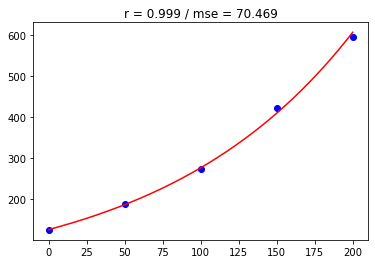

In [103]:
## linear regression: y = a + b * x

# copy data
X1 = X.copy()
Y1 = Y.copy()
# estimate coefficients
a1, b1 = coefficients(X1, Y1)
# equation
seq1 = "y = %.3f + %.3f * x "%(a1, b1)
reg1 = lambda x: a1 + b1 * x 
# metrics
r1 = cov(X1,Y1) / np.sqrt(var(X1) * var(Y1))
mse1 = np.nanmean((Y1 - reg1(X1))**2)

## logaritmic regression: y = a + b * log(x)

# copy data
X2 = np.log(X)
Y2 = Y.copy()
# validate
i = np.where(~np.isinf(X2))[0]
X2 = X2[i]
Y2 = Y2[i]
# estimate coefficients
a2, b2 = coefficients(X2, Y2)
# equation
seq2 = "y = %.3f + %.3f * log(x) "%(a2, b2)
reg2 = lambda x: a2 + b2 * np.log(x) 
# metrics
r2 = cov(X2,Y2) / np.sqrt(var(X2) * var(Y2))
mse2 = np.nanmean((Y[i] - reg2(X[i]))**2)


## # exponential regression: y = a * exp(b * x) --> log(y) = log(a) + b * x

# copy data
X3 = X.copy()
Y3 = np.log(Y)
# validate
i = np.where(~np.isinf(Y3))[0]
X3 = X3[i]
Y3 = Y3[i]
# estimate coefficients
a3, b3 = coefficients(X3, Y3)
a3 = np.exp(a3)
# equation
seq3 = "y = %.3f * exp( %.3f * x ) "%(a3, b3)
reg3 = lambda x: a3 * np.exp(b3 * x)
# metrics
r3 = cov(X3,Y3) / np.sqrt(var(X3) * var(Y3))
mse3 = np.nanmean((Y[i] - reg3(X[i]))**2)

# display
print("linear: r = %.3f / mse = %.3f / %s"%(r1, mse1, seq1))
print("log:    r = %.3f / mse = %.3f / %s"%(r2, mse2, seq2))
print("exp:    r = %.3f / mse = %.3f / %s"%(r3, mse3, seq3))

# minimum error
min_mse = np.nanmin([mse1, mse2, mse3])

# select best fit
if min_mse == mse1:
    # estimate coefficients
    a, b = a1, b1
    # equation
    seq = seq1
    reg = reg1
    # metrics
    r, mse = r1, mse1
elif min_mse == mse2:
    # estimate coefficients
    a, b = a2, b2
    # equation
    seq = seq2
    reg = reg2
    # metrics
    r, mse = r2, mse2    
elif min_mse == mse3:
    # estimate coefficients
    a, b = a3, b3
    # equation
    seq = seq3
    reg = reg3
    # metrics
    r, mse = r3, mse3
else:
    seq = ""
    r, mse = np.nan, np.nan

# display
print(seq)
print("r = %.3f / mse = %.3f"%(r, mse))

# plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(X,Y, color = "blue")
xi = np.arange(np.min(X),np.max(X),0.1)
yi = reg(xi)
ax.plot(xi, yi, color = "red")
ax.set_title("r = %.3f / mse = %.3f"%(r, mse))
plt.show()